# MACHINE LEARNING FOR FINANCIAL SERVICES 

Welcome to IBM's Data Science Experience! This exciting tool will help your life a lot easier as a data scientist.  Below is a simple introductory example of how easy for you to load your data and run some simple regression models.

## Simple Linear Regression & Supervised Learning for Logistic Regression

Regression mode is a quite popular statistical modeling technique as it is intuitive to understand its concept by showing relationship between attributes. There are two major types of regression models: linear and logistic regressions.  Linear regression is designed to show linear relationship between independent and dependent variables, while logistic regression is designed for categorical dependent variable. Logistic regression, despite its name, is a linear model for classification rather than regression.  In spite of its simple concept, the relationship should be carefully considered as it does not necessarily show causality, but rather correlation.

## Scikit Learn

> from [wikipedia](https://en.wikipedia.org/wiki/Scikit-learn)

Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.  It also includes a few rudimentary deep learning packages as well.  I plan to utilize Scikit Learn library for many of my illustrative examples as it is well-documented and well-used in Python community.

### To load the data:

1. Load your local file into your notebook. Click the **Find and Add Data** icon on the notebook action bar. Drop the file into the box or browse to select the file. The file is loaded to your object storage and appears in the Data Assets section of the project. For more information, see <a href="https://datascience.ibm.com/docs/content/analyze-data/load-and-access-data.html" target="_blank" rel="noopener noreferrer">Load and access data</a>.
1. click in the next code cell and select **Insert to code > pandas DataFrame** under the file name.

For this exercise, the above steps were done in advance, and a csv file has been put in this notebook's working directory


In [1]:
from io import StringIO
import requests
import json
import pandas as pd

# @hidden_cell
# This function accesses a file in your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook.

def get_object_storage_file_with_credentials_fcf1c90868844bc1ab7d4fffe6063140(container, filename):
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage."""

    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': 'member_cf2f28cf1cf37485c31a0c2d2443463e000ad9b0','domain': {'id': '20b49a5877434f9486aa2a1d2fcdd21c'},
            'password': 'tVP(ZWG8k9J._ZhB'}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', container, '/', filename])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO(resp2.text)

df = pd.read_csv(get_object_storage_file_with_credentials_fcf1c90868844bc1ab7d4fffe6063140('MachineLearningShowcase', 'CRPMT_SAMPLE.csv'))
df.to_csv('CRPMT_SAMPLE.csv', index = False)

df.head()
df.describe()

,﻿ACCT_NO,CURR_BAL,TENURE,CUST_INC,CUST_AGE,PMT_DUE,NO_DM_CNT,WRITE_OFF_IND,FICO_SCR
count,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000
mean,1595.500000,1804.107770,6.432459,83260.531148,40.132787,99.196262,9.870492,0.150820,701.326230
std,176.236111,2905.286132,4.634506,42206.490438,11.691593,142.255957,6.714781,0.358167,85.151137
min,1291.000000,-25.000000,0.100000,25089.000000,19.000000,0.000000,1.000000,0.000000,551.000000
25%,1443.250000,331.752500,2.800000,54015.500000,31.000000,22.662500,4.000000,0.000000,625.000000
50%,1595.500000,680.625000,5.900000,73585.500000,40.000000,46.400000,7.000000,0.000000,693.500000
75%,1747.750000,1049.462500,8.900000,94804.250000,49.000000,78.462500,15.000000,0.000000,780.000000
max,1900.000000,11996.610000,22.000000,217338.000000,69.000000,599.830000,26.000000,1.000000,849.000000


## Attributes in the sample file 

> this is a hypothetical sample file from a credit card company, in which a few attributes are mocked up for the various aspects of credit/payment business such as risk management, contact strategy and CRM

1. ACCT_NO: Account Number
1. PROD: Product Tier (1.REG: regular, 2.GOLD: gold and 3.PLAT: platinum cards)
1. CURR_BAL: Current balance on the account
1. TENURE: # of years since the account opened
1. CUST_AGE: Customer's age in years
1. PMT_DUE: Due amount on current billing cycle
1. NO_DM_CNT: # of Direct Mail Contacts for the last 2 years
1. WRITE_OFF_IND: Write-Off Indicator (0: Not written-off, 1: Written-Off)
1. FICO_SCR: Fair-Issac Score or FICO (a credit score that is being calculated by US credit bureau such as Experian, Equifax or TransUnion)

## SIMPLE LINEAR REGRESSION

## Are you sending junk mails to your profitable customers?

In this section, I'd like to show a very simple linear regression relationship by taking a sample credit card data.  Across different industry sectors where direct customer and prospect marketing is necessary, this became a typical and annoying challenge for many companies and consumers as their marketing contact strategy was specifically concentrated on profitable customer segments.  In this sample credit card data, the higher credit-worthy customers were, the more pieces of direct mails were sent.  This led to "adverse selection" (meaning those responded the marketing contacts are usually borderline or marginally valued marketing segments) or to attrition or marketing opt-outs from the highly profitable customers.  

In [7]:
# create a feature, FICO SCORE, and a response, # OF DIRECT MAIL CONTACTS, vectors

X = df.FICO_SCR
y = df.NO_DM_CNT


# reshape X and y to the single array of the attributes as follows

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

In [3]:
# running a linear regression model

from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [4]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

[-26.3048179]
[[ 0.05158129]]


## Visualizing Linear Regression 

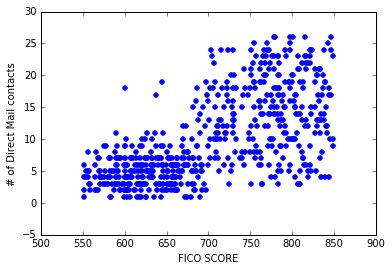

In [5]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# Plot true values versus the predictions
plt.scatter(df.FICO_SCR, df.NO_DM_CNT, color="b")
plt.xlabel("FICO SCORE")
plt.ylabel("# of Direct Mail contacts")
plt.show()

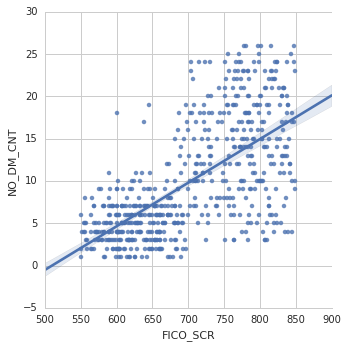

In [6]:
# Quick visualization of data relationships using seaborn visualization API
import seaborn as sns
sns.set_style('whitegrid')

# Using seabron to create a linear fit
sns.lmplot('FICO_SCR','NO_DM_CNT', data = df)

## CREDIT DEFAULT PREDICTION 

### LOGSTIC REGRESSION MODEL SETUP, TRAINING & ACCURACY CHECK

#### Below is an illustrative example of finding out how write-off response may be correlated with predictor (feature) variables by training a multi-variate logistic regression model

In [25]:
# as a regression model needs numerical attributes, let's convert PROD into a numerical format

df['PROD_NO'] = df.PROD.map({'1.REG':0, '2.GOLD':1, '3.PLAT':2})
df.head(5)

,﻿ACCT_NO,PROD,CURR_BAL,TENURE,CUST_INC,CUST_AGE,PMT_DUE,NO_DM_CNT,WRITE_OFF_IND,FICO_SCR,PROD_NO
0,1291,1.REG,755.16,3.0,44212,46,60.41,5,1,651,0
1,1292,1.REG,276.61,0.7,86249,34,22.13,10,0,702,0
2,1293,2.GOLD,424.70,0.1,79474,45,21.23,22,0,753,1
3,1294,3.PLAT,11683.23,10.8,81198,58,584.16,22,0,763,2
4,1295,1.REG,246.34,5.5,63502,35,19.71,11,1,590,0


In [8]:
# or IF YOU'D LIKE TO USE BUILT-IN SCIKIT-LEARN LABEL ENCODER, PLEASE RUN BELOW
# converting PROD to numerical (0: 1.REG, 1: 2.GOLD, 2: 3.PLAT)

#from sklearn.preprocessing import LabelEncoder

#lenc = LabelEncoder()
#lenc.fit(df['PROD'])

#df['PROD_NO'] = lenc.transform(df['PROD'])

#df.head(5)

In [26]:
# select a few numerical variables (predictors)

feature_cols = [          
    'CURR_BAL',                                               
    'TENURE',                       
    'CUST_INC',                      
    'CUST_AGE',                                
    'PMT_DUE',                                               
    'NO_DM_CNT',               
    'FICO_SCR',
    'PROD_NO'
]

In [27]:
# create a feature matrix 'X' 

X = df[feature_cols]
X.shape

#print (type(X))
# X.head()

(610, 8)

In [28]:
# create a response vector series 'y' 
y = df.WRITE_OFF_IND
y.shape
#y.dtypes

(610,)

In [29]:
# if you need to upgrade scikit learn
#!pip install --upgrade scikit-learn

In [30]:
# splitting in-sample training and test datasets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [31]:
# default split is 75% for training and 25% for testing; but chose above test size (test_size)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(427, 8)
(427,)
(183, 8)
(183,)


In [32]:
# import and instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# train the model
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
# make class predictions for X_test
# as there are a large number of zero values, the predictions are also skewed into zeros as well

y_pred_class = logreg.predict(X_test)
y_pred_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [34]:
# calculate predicted probabilities for X_test (well calibrated)
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
y_pred_prob

array([ 0.0934099 ,  0.04956315,  0.01678545,  0.06110013,  0.27325643,
        0.07770864,  0.24397741,  0.1343003 ,  0.20399036,  0.01315277,
        0.26386769,  0.31863156,  0.21723917,  0.11203494,  0.1221481 ,
        0.01283024,  0.16212847,  0.21597457,  0.07852633,  0.03195917,
        0.24450158,  0.26583027,  0.21118295,  0.21891135,  0.17318447,
        0.01690514,  0.01285819,  0.30946728,  0.12909855,  0.2770037 ,
        0.17128316,  0.19256704,  0.276739  ,  0.08132256,  0.14355291,
        0.07846289,  0.05828882,  0.27418517,  0.3057365 ,  0.04422431,
        0.16328845,  0.19719879,  0.21356105,  0.06820325,  0.25015397,
        0.12277835,  0.20475214,  0.12173307,  0.15268907,  0.21395021,
        0.00523248,  0.15953311,  0.14662286,  0.02757084,  0.03628059,
        0.21398361,  0.00946932,  0.18631711,  0.28585663,  0.22227366,
        0.24889873,  0.01994516,  0.23821044,  0.19919284,  0.04252697,
        0.22257001,  0.00682256,  0.11125886,  0.17798398,  0.03

In [35]:
import sklearn.metrics as metrics

# calculate accuracy
print 'Accuracy score is: {}'.format(metrics.accuracy_score(y_test, y_pred_class))

Accuracy score is: 0.83606557377


In [36]:
# calculate AUC
print 'AUC is: {}'.format(metrics.roc_auc_score(y_test, y_pred_prob))

AUC is: 0.704357298475


#### ROC curve allows to see how sensitivity and specificity are affected by various thresholds, and AUC is the percentage of the ROC plot that is underneath the curve

- AUC is useful as a single number summary of classifier performance.
- If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a higher predicted probability to the positive observation.
- AUC is useful even when there is high class imbalance (unlike classification accuracy).

In [37]:
# make predictions on the sample testing set (observations 20 thru 60)
y_pred = logreg.predict(X_test)
y_pred[20:60]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [38]:
y_pred.shape

(183,)

## Re-setting the threshold (changing the sensitivity)

In [39]:
# if you like to re-set the threshold; or changes the sensitivity for the target value
# in other words, we are setting 0.20 (or 20% probability of written-offs) as a threshold 

# round or classify numpy array of y_pred_prob with a specific threshold

from sklearn.preprocessing import binarize
y_pred_newcl = binarize([y_pred_prob], 0.20)[0]
y_pred_newcl

array([ 0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,
        0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,
        0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,
        0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
        1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
        0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [40]:
# calculate the new accuracy
# the lower accuracy gets compensated with the increased sensitivity 

print 'Accuracy score is: {}'.format(metrics.accuracy_score(y_test, y_pred_newcl))

Accuracy score is: 0.666666666667


## SUMMARY
This illustrative python notebook shows how to get started with a simple machine learning utilizing linear regression modelling technique.  I hope you to see how easy to adopt IBM's Data Science Experience for your data analytics and modeling needs.  Please find overview and getting-started information in the Data Science Experience documentation: https://datascience.ibm.com/docs/content/getting-started/welcome-main.html. 
Learn about Jupyter notebooks, which are used throughout this scenario, in the Data Science Experience documentation: https://datascience.ibm.com/docs/content/analyze-data/notebooks-parent.html